In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

In [2]:
datasets = {
    "No encoded columns": "content/combined_data_none_encoded.csv",
    "No encoded columns except year, binned actor_age and actor gender": "content/combined_data_not_encoded.csv",
    "Encoding top 10 categories with over 50% represented": "content/combined_data_all_encoded_10.csv",
    "Encoding top 100 categories with over 50% represented": "content/combined_data_all_encoded_100.csv",
    "Encoding top 500 categories with over 50% represented": "content/combined_data_all_encoded_500.csv",
}

In [3]:
maes = []

for desc, fp in datasets.items():
    df = pd.read_csv(fp)
    print("\n" + fp)

    y = df["weighted_average_vote"].astype(float)
    X = df.drop(
        ["imdb_title_id", "title", "weighted_average_vote"],
        axis=1,
    ).astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    dim = X.shape[1]

    # define the keras model
    model = Sequential()
    model.add(
        Dense(dim * 2, input_dim=dim, activation="relu", kernel_initializer="he_normal")
    )
    model.add(Dense(dim, activation="sigmoid", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(1, activation="linear"))

    model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

    hist = model.fit(
        X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test)
    ).history

    yhat = model.predict(X_test)
    error = mean_absolute_error(y_test, yhat)
    print("\n" + desc)

    maes.append(hist)

    print("MAE: %.3f\n" % error)


content/combined_data_none_encoded.csv
Epoch 1/10
74/74 [==============================] - 1s 6ms/step - loss: 27.7974 - mse: 27.7974 - mae: 5.1359 - val_loss: 23.7010 - val_mse: 23.7010 - val_mae: 4.7173
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 18.7625 - mse: 18.7625 - mae: 4.1551 - val_loss: 13.8591 - val_mse: 13.8591 - val_mae: 3.5239
Epoch 3/10
74/74 [==============================] - 0s 2ms/step - loss: 9.5958 - mse: 9.5958 - mae: 2.8545 - val_loss: 6.0165 - val_mse: 6.0165 - val_mae: 2.2101
Epoch 4/10
74/74 [==============================] - 0s 2ms/step - loss: 3.7839 - mse: 3.7839 - mae: 1.6829 - val_loss: 2.3978 - val_mse: 2.3978 - val_mae: 1.3078
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 1.8040 - mse: 1.8040 - mae: 1.1078 - val_loss: 1.6129 - val_mse: 1.6129 - val_mae: 1.0143
Epoch 6/10
74/74 [==============================] - 0s 2ms/step - loss: 1.4516 - mse: 1.4516 - mae: 0.9581 - val_loss: 1.4759 - val_mse: 1.475

Epoch 9/10
74/74 [==============================] - 1s 7ms/step - loss: 0.6328 - mse: 0.6328 - mae: 0.6039 - val_loss: 0.9697 - val_mse: 0.9697 - val_mae: 0.7567
Epoch 10/10
74/74 [==============================] - 0s 6ms/step - loss: 0.5630 - mse: 0.5630 - mae: 0.5655 - val_loss: 0.9887 - val_mse: 0.9887 - val_mae: 0.7647

Encoding top 500 categories with over 50% represented
MAE: 0.765



file: none encoded - MAE: 0.884
file: less encoded - MAE: 0.795
file: all encoded 10 - MAE: 0.777
file: all encoded 100 - MAE: 0.781
file: all encoded 500 - MAE: 0.765


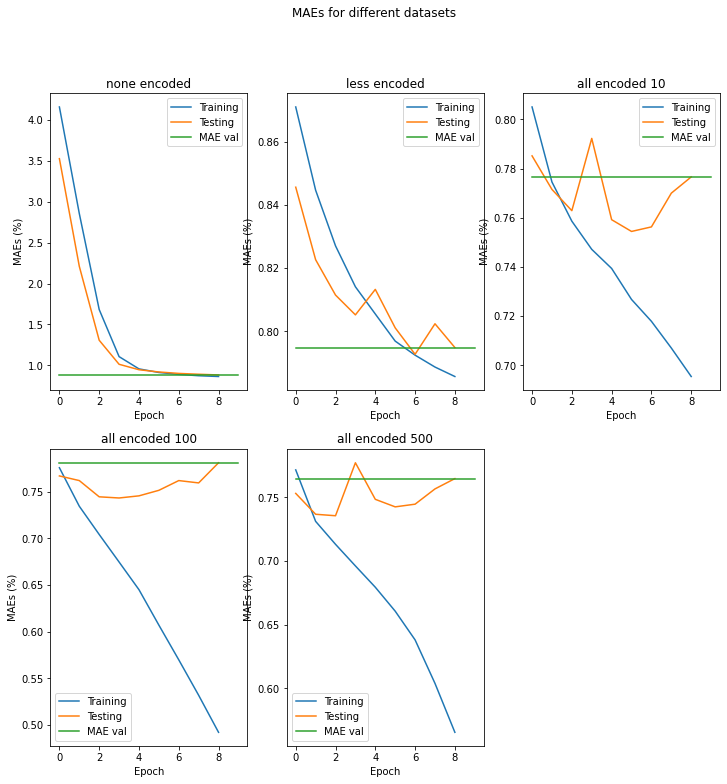

In [4]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(12, 12))
plt.suptitle("MAEs for different datasets")

titles = ["none encoded", "less encoded", "all encoded 10", "all encoded 100", "all encoded 500"]

for i, hist in enumerate(maes):
    plt.subplot(2, 3, i + 1)
    mae_val = hist["val_mae"][9]
    
    plt.plot(hist["mae"][1:])
    plt.plot(hist["val_mae"][1:])
    plt.plot([mae_val for i in range(10)])
    plt.legend(["Training", "Testing", "MAE val"])
    plt.title(titles[i])
    plt.ylabel("MAEs (%)")
    plt.xlabel("Epoch")
    
    print(f"file: {titles[i]} - MAE: {mae_val:.3f}")

plt.savefig("datasetMAEs.png" ,bbox_inches="tight", facecolor="white")
plt.show()

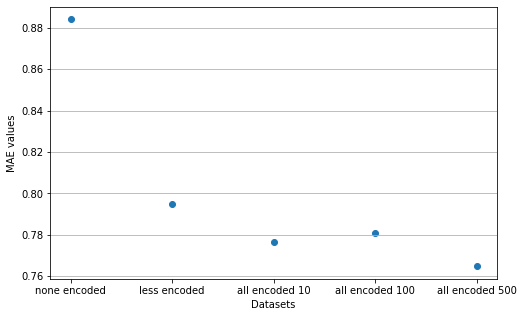

In [5]:
mae_vals = [h["val_mae"][9] for h in maes]

plt.scatter(
    titles,
    mae_vals
)
plt.grid(b=True, axis="y")
plt.xlabel("Datasets")
plt.ylabel("MAE values")
plt.gcf().set_size_inches(8, 5, forward=True)